# Laboratory 3

## Import needed libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import csv
import arff
from scipy.io.arff import loadarff 
from sklearn import decomposition
from sklearn import preprocessing

from sklearn import datasets
from sklearn.decomposition import PCA

## Load datasets
Here we are loading 2 datasets:
1. Iris flowes
2. Wine

In [2]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

wine = datasets.load_wine()
wine_df = pd.DataFrame(data= np.c_[wine['data'], wine['target']],
                     columns= wine['feature_names'] + ['target'])

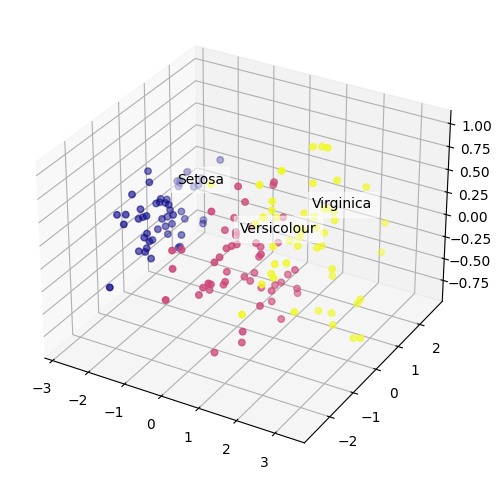

In [3]:
classes = iris_df["target"]
noclass = iris_df.drop(["target"],axis=1)
x = noclass
min_max_scaler = preprocessing.StandardScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
X = df
Y = classes

pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)
plt.figure(figsize =(6, 6))
plot_axes = plt.axes(projection = '3d')
for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    plot_axes.text3D(
        X[Y == label, 0].mean(),
        X[Y == label, 1].mean() + 1.5,
        X[Y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
plot_axes.scatter3D(X[:, 0], X[:, 1], X[:, 2], s=22, c=Y, cmap=plt.cm.plasma)

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import seaborn as sns

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.7, random_state=0)

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [6]:
y_pred = knn.predict(X_test)
y_proba = knn.predict_proba(X_test)
y_proba = y_proba[:,1]

In [7]:
fs = f1_score(y_test,y_pred, average=None)
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred, average=None)
rec = recall_score(y_test,y_pred, average=None)

fs, acc, prec, rec

(array([1.        , 0.83950617, 0.79365079]),
 0.8761904761904762,
 array([1.        , 0.72340426, 1.        ]),
 array([1.        , 1.        , 0.65789474]))

     Exact_values  Predictions
114           2.0          2.0
62            1.0          1.0
33            0.0          0.0
107           2.0          2.0
7             0.0          0.0
..            ...          ...
38            0.0          0.0
5             0.0          0.0
53            1.0          1.0
143           2.0          2.0
105           2.0          2.0

[105 rows x 2 columns]
Predictions   0.0  1.0  2.0
Exact_values               
0.0            33    0    0
1.0             0   34    0
2.0             0   13   25


<Axes: xlabel='Predictions', ylabel='Exact_values'>

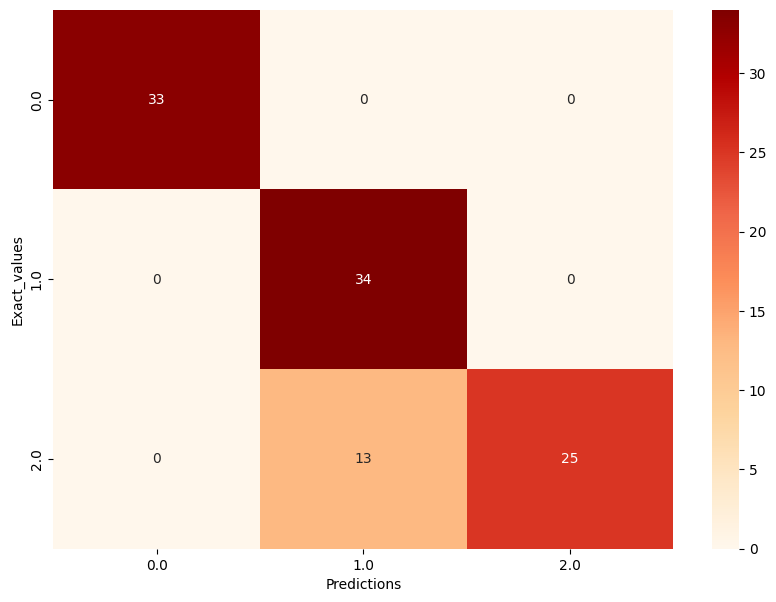

In [8]:
data = {'Exact_values': y_test, "Predictions": y_pred}
df = pd.DataFrame(data=data)
print(df)

results = pd.crosstab(df['Exact_values'],df['Predictions'])
print(results)
plt.figure(figsize=(10,7))
sns.heatmap(results, annot=True, cmap="OrRd", fmt=".0f")

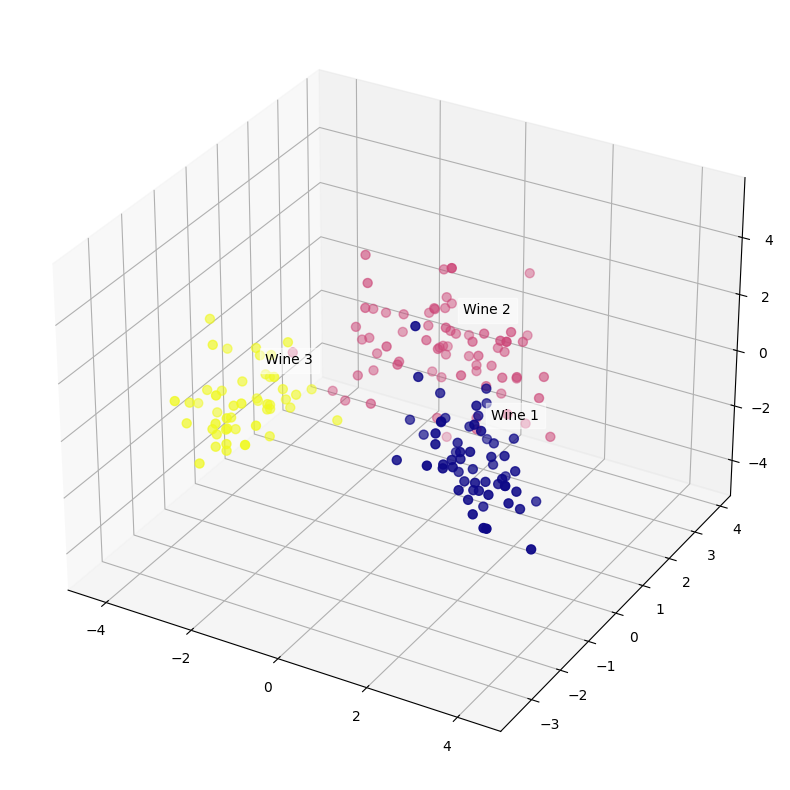

In [9]:
classes = wine_df["target"]
noclass = wine_df.drop(["target"],axis=1)
x = noclass
min_max_scaler = preprocessing.StandardScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
X = df
Y = classes
pca.fit(X)
X = pca.transform(X)



plt.figure(figsize =(10, 10))
plot_axes = plt.axes(projection = '3d')
for name, label in [("Wine 1", 0), ("Wine 2", 1), ("Wine 3", 2)]:
    plot_axes.text3D(
        X[Y == label, 0].mean(),
        X[Y == label, 1].mean() + 1.5,
        X[Y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
plot_axes.scatter3D(X[:, 0], X[:, 1], X[:, 2], s=42, c=Y, cmap=plt.cm.plasma)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.7, random_state=0)

knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

fs = f1_score(y_test,y_pred, average=None)
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred, average=None)
rec = recall_score(y_test,y_pred, average=None)

fs, acc, prec, rec

(array([0.92307692, 0.89361702, 0.95384615]),
 0.92,
 array([0.85714286, 1.        , 0.91176471]),
 array([1.        , 0.80769231, 1.        ]))

     Exact_values  Predictions
54            0.0          0.0
151           2.0          2.0
63            1.0          1.0
55            0.0          0.0
123           1.0          1.0
..            ...          ...
119           1.0          1.0
102           1.0          1.0
35            0.0          0.0
57            0.0          0.0
41            0.0          0.0

[125 rows x 2 columns]
Predictions   0.0  1.0  2.0
Exact_values               
0.0            42    0    0
1.0             7   42    3
2.0             0    0   31


<Axes: xlabel='Predictions', ylabel='Exact_values'>

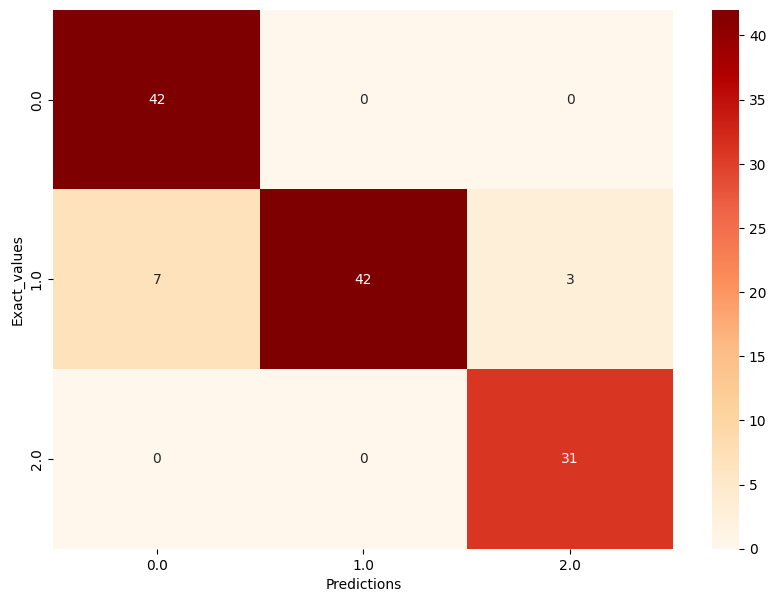

In [11]:
data = {'Exact_values': y_test, "Predictions": y_pred}
df = pd.DataFrame(data=data)
print(df)

results = pd.crosstab(df['Exact_values'],df['Predictions'])
print(results)
plt.figure(figsize=(10,7))
sns.heatmap(results, annot=True, cmap="OrRd", fmt=".0f")

# Bankruptcy

In [58]:
data1 = loadarff('1year.arff')
data2 = loadarff('2year.arff')
data3 = loadarff('3year.arff')
data4 = loadarff('4year.arff')
data5 = loadarff('5year.arff')

d1 = pd.DataFrame(data1[0])
d2 = pd.DataFrame(data2[0])
d3 = pd.DataFrame(data3[0])
d4 = pd.DataFrame(data4[0])
d5 = pd.DataFrame(data5[0])

f = [  d5 ]
all_df = pd.concat(f)

all_df = all_df.astype(float)

# all_df = all_df.dropna()
all_df.fillna(all_df.mean(), inplace=True)

all_df.groupby("class").describe()

# all_df = all_df.drop(columns=["Attr39","Attr42","Attr43","Attr44","Attr13","Attr20","Attr45","Attr56","Attr58"])

corr = all_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
Attr1,1.000000,-0.192969,0.055964,0.000903,0.000198,0.727370,0.520071,0.000584,0.095136,-0.433635,0.974332,-0.000253,0.000289,0.520071,0.000190,0.001803,0.000578,0.518445,0.001576,0.007223,-0.000033,0.970872,0.005622,0.807011,-0.725048,0.001719,0.001579,0.002080,0.045254,-0.003135,0.001543,-0.000330,0.000814,0.000716,0.973022,-0.950514,0.000274,-0.308056,0.014904,0.000561,0.000569,0.004934,0.002093,0.000589,0.000363,0.000635,0.000695,0.971697,0.005452,0.000700,-0.042333,-0.000461,-0.337733,-0.331241,0.004482,0.011558,0.002738,0.011704,0.000694,0.000254,0.009739,-0.002090,0.001324,-0.173136,-0.058897
Attr2,-0.192969,1.000000,-0.099898,-0.002658,-0.001352,-0.709909,0.716802,-0.003701,-0.495885,-0.796110,0.027450,0.013276,0.002151,0.716802,-0.000654,-0.002428,-0.003712,0.714574,0.010632,-0.044307,0.000683,0.041087,-0.010863,0.052588,-0.467562,-0.001902,-0.001751,-0.003547,0.011957,0.026428,0.012685,0.002011,-0.003227,-0.002127,0.030195,-0.060228,-0.000535,-0.871827,-0.009110,-0.000489,-0.000181,-0.003524,-0.004143,0.005844,0.000016,-0.001174,-0.001854,0.035382,-0.004161,-0.002553,0.053973,0.003966,-0.004358,-0.003836,-0.010130,-0.015680,-0.001836,-0.098119,0.000963,0.000187,-0.074872,0.011968,-0.003677,0.001098,0.035581
Attr3,0.055964,-0.099898,1.000000,0.021429,0.004879,0.007278,0.102217,0.017484,-0.144775,0.127972,0.072566,0.015811,0.005213,0.102217,-0.002241,0.014510,0.017576,0.101760,0.039510,0.016843,0.001183,0.034649,0.037683,0.074243,0.251668,0.014275,0.013111,0.030540,0.014214,-0.062366,0.033590,-0.018584,0.022362,0.017306,0.030451,0.028222,0.007512,0.085595,0.057093,0.019452,-0.000911,0.026298,0.016021,0.013485,0.000381,0.019329,0.001719,0.028007,0.026901,0.019288,-0.910785,-0.017513,0.026209,0.028009,0.059162,0.054312,0.008222,-0.059738,-0.004326,-0.000410,-0.059806,-0.065365,0.024470,0.001984,-0.132123
Attr4,0.000903,-0.002658,0.021429,1.000000,0.002202,-0.000549,0.001188,0.905787,-0.011183,0.002896,0.001068,0.922744,-0.002239,0.001188,-0.000407,0.969947,0.905763,0.001142,-0.009753,-0.001738,-0.000538,0.000762,-0.010104,-0.000265,0.004086,0.968935,0.002153,0.014728,-0.039270,-0.004259,-0.010163,-0.001014,0.967058,0.977409,-0.000057,-0.002139,0.000696,0.001858,-0.002911,0.994366,-0.000934,-0.001293,0.013677,0.015276,-0.000221,0.999713,-0.000559,0.000664,-0.001243,0.995081,-0.014831,-0.001979,0.012469,0.013923,-0.000227,-0.002525,0.001134,-0.001916,-0.001963,-0.000241,-0.003771,-0.001625,0.967649,0.001346,-0.000984
Attr5,0.000198,-0.001352,0.004879,0.002202,1.000000,0.000239,0.000230,0.004463,-0.040174,0.001746,0.000168,0.000307,0.000983,0.000230,-0.014050,0.000243,0.004547,0.000217,0.006143,-0.001869,-0.000173,0.000185,0.005966,-0.000262,0.000880,0.000216,0.000319,-0.000026,-0.008176,-0.044735,0.005239,-0.020030,0.000345,0.000290,0.000184,-0.000726,0.000105,0.001266,0.003230,0.002033,0.049703,0.016620,-0.011222,-0.011765,-0.000048,0.002162,-0.000851,0.000271,0.017185,0.002152,-0.006829,-0.329553,-0.000102,-0.000043,0.002096,0.011181,0.000360,-0.010729,-0.000547,0.000053,-0.002602,-0.045057,0.000568,-0.000255,-0.035198
Attr6,0.727370,-0.709909,0.007278,-0.000549,0.000239,1.000000,-0.119785,-0.000566,0.358166,0.198640,0.577388,-0.011179,-0.001643,-0.119785,0.000899,0.000280,-0.000579,-0.119414,-0.008770,0.029899,-0.000195,0.573263,0.006804,0.635139,-0.185838,-0.000086,-0.000327,0.002296,0.016715,-0.016632,-0.010255,-0.002114,-0.000178,-0.000544,0.581749,-0.550111,0.000170,0.325686,0.011335,-0.001849,0.000122,0.004110,0.002934,-0.003794,-0.000015,-0.001408,0.001566,0.577543,0.004726,-0

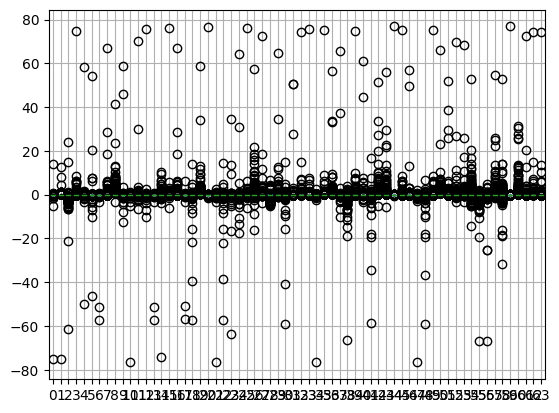

In [154]:
classes = all_df["class"]
noclass = all_df.drop(["class"],axis=1)

x = noclass
# min_max_scaler = preprocessing.QuantileTransformer(n_quantiles=5000)
# min_max_scaler = preprocessing.MaxAbsScaler()
min_max_scaler = preprocessing.StandardScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
 
df.boxplot()
plt.show()

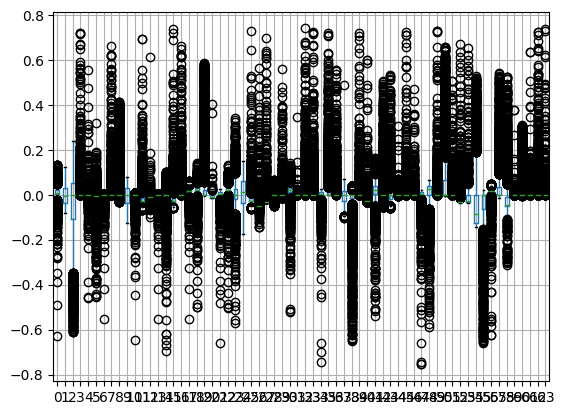

In [155]:
k = df.quantile(1)/df.std()
np.abs(df-df.mean()) > (k/2)

# df[np.abs(df-df.mean()) >= (1/30)*df.quantile(1)] = 0

df[df >= df.quantile(1)/100] = 0
df[df <= df.quantile(0)/100] = 0

df.boxplot()
plt.show()

In [156]:
df['class'] = classes.tolist()
df = df.dropna()
df.groupby("class").describe()

0                                                               \
        count      mean       std       min       25%       50%       75%   
class                                                                       
0.0    5500.0  0.013736  0.024192 -0.280213  0.004775  0.011989  0.023048   
1.0     410.0 -0.021360  0.064633 -0.627089 -0.033358 -0.006787  0.006946   

                     1             ...   62                63            \
            max   count      mean  ...  75%       max   count      mean   
class                              ...                                    
0.0    0.134301  5500.0 -0.002950  ...  0.0  0.726736  5500.0  0.003401   
1.0    0.133188   410.0  0.020903  ...  0.0  0.424420   410.0  0.004709   

                                                    
            std       min  25%  50%  75%       max  
class                                               
0.0    0.031631 -0.000142  0.0  0.0  0.0  0.738054  
1.0    0.026683  0.000000  0.0  0.0  0.0  0.301493  

[2 rows x 512 columns]

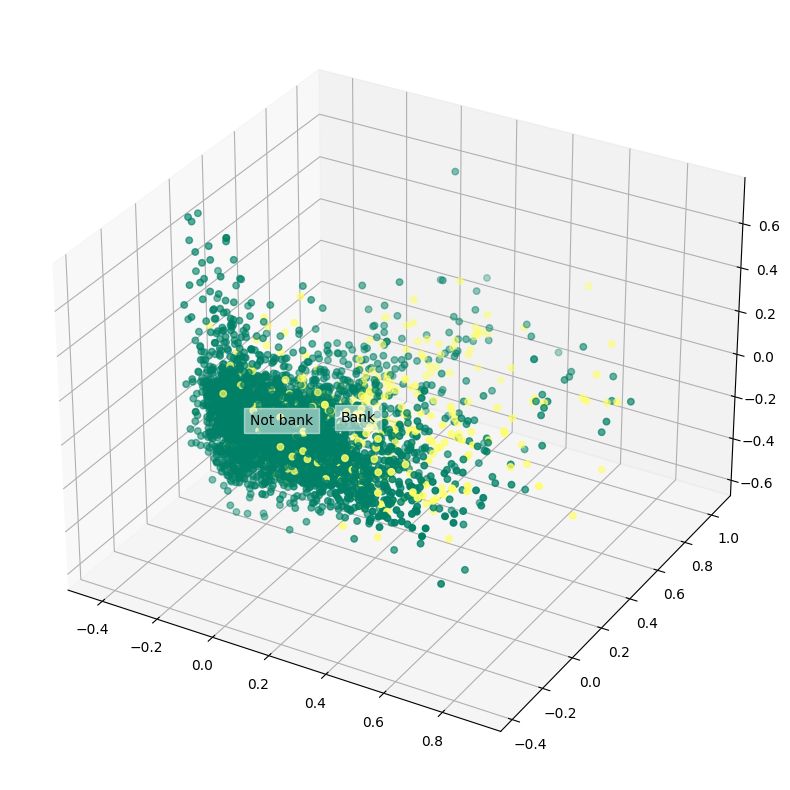

In [157]:
COMPONENTS = 3
pca = decomposition.PCA(n_components=COMPONENTS)
X = df.drop(columns='class')
Y = df["class"]
pca.fit(X)
X_pca = pca.transform(X)

if COMPONENTS <= 4:
    plt.figure(figsize =(10, 10))
    plot_axes = plt.axes(projection = '3d')
    for name, label in [("Not bank", 0), ("Bank", 1)]:
        plot_axes.text3D(
            X_pca[Y == label, 0].mean(),
            X_pca[Y == label, 1].mean(),
            X_pca[Y == label, 2].mean(),
            name,
            horizontalalignment="center",
            bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
        )
    if COMPONENTS == 3:
        plot_axes.scatter3D(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], s=22, c=Y, cmap=plt.cm.summer)        
    else:
        plot_axes.scatter3D(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], s=30*X_pca[:, 3], c=Y, cmap=plt.cm.summer)
    plt.show()

/home/krystian/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5910 samples in 0.001s...
[t-SNE] Computed neighbors for 5910 samples in 0.187s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5910
[t-SNE] Computed conditional probabilities for sample 2000 / 5910
[t-SNE] Computed conditional probabilities for sample 3000 / 5910
[t-SNE] Computed conditional probabilities for sample 4000 / 5910
[t-SNE] Computed conditional probabilities for sample 5000 / 5910
[t-SNE] Computed conditional probabilities for sample 5910 / 5910
[t-SNE] Mean sigma: 0.172036
[t-SNE] Computed conditional probabilities in 0.122s
[t-SNE] Iteration 50: error = 90.1000595, gradient norm = 0.0007373 (50 iterations in 2.907s)
[t-SNE] Iteration 100: error = 84.7183609, gradient norm = 0.0009564 (50 iterations in 3.989s)
[t-SNE] Iteration 150: error = 84.3478317, gradient norm = 0.0002775 (50 iterations in 2.839s)
[t-SNE] Iteration 200: error = 84.2742462, gradient norm = 0.0000840 (50 iterations in 2.770s)
[t

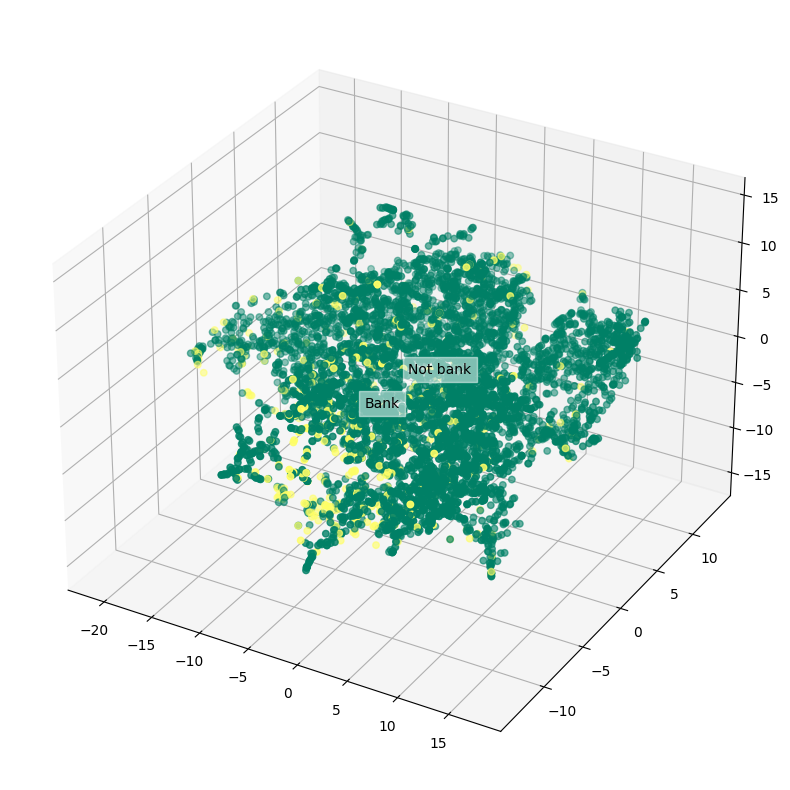

In [79]:
from sklearn import manifold

tsne = manifold.TSNE(n_components=3, random_state=0, perplexity= 30,learning_rate=90, n_iter=500, verbose=2)
X2 = tsne.fit_transform(X)
plt.figure(figsize =(10, 10))
plot_axes = plt.axes(projection = '3d')
for name, label in [("Not bank", 0), ("Bank", 1)]:
    plot_axes.text3D(
        X2[Y == label, 0].mean(),
        X2[Y == label, 1].mean() + 1.5,
        X2[Y == label, 1].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
plot_axes.scatter3D(X2[:, 0], X2[:, 1], X2[:, 2], s=22, c=Y, cmap=plt.cm.summer)
plt.show()

f-score:  [0.95698685 0.19917012]
acc:  0.9183587140439933
prec:  [0.94207986 0.28235294]
rec:  [0.97237319 0.15384615]
      Exact_values  Predictions
4519           0.0          0.0
3147           0.0          0.0
3037           0.0          0.0
712            0.0          0.0
5411           0.0          0.0
...            ...          ...
5106           0.0          0.0
1565           0.0          0.0
4524           0.0          0.0
2963           0.0          0.0
3622           0.0          0.0

[2364 rows x 2 columns]
Predictions    0.0  1.0
Exact_values           
0.0           2147   61
1.0            132   24


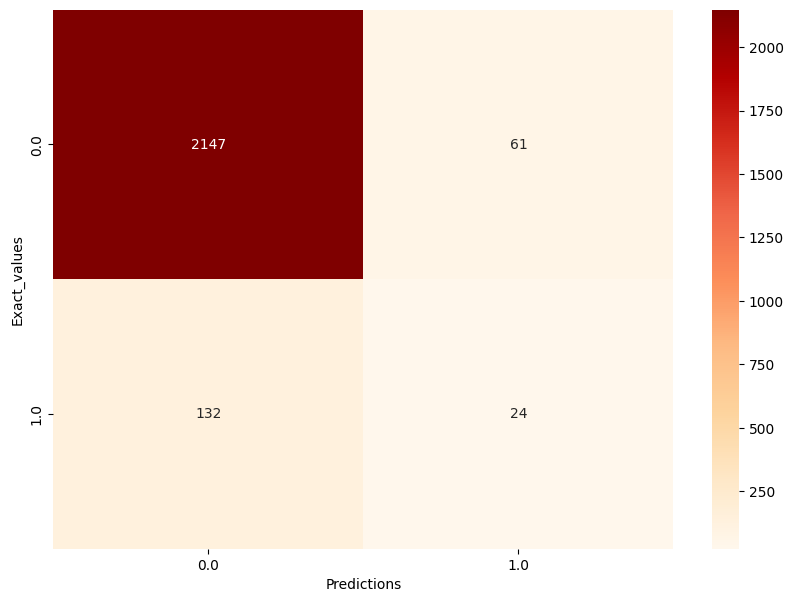

In [158]:
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, test_size=0.4, random_state=1)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

knn = KNeighborsClassifier(n_neighbors=3)
# knn = MLPClassifier(alpha=2, max_iter=10000)
# knn = MLPClassifier(max_iter=5500)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

fs = f1_score(y_test,y_pred, average=None)
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred, average=None)
rec = recall_score(y_test,y_pred, average=None)

print("f-score: ", fs)
print("acc: ", acc)
print("prec: ", prec)
print("rec: ", rec)

data = {'Exact_values': y_test, "Predictions": y_pred}
df_crosstab = pd.DataFrame(data=data)
print(df_crosstab)

results = pd.crosstab(df_crosstab['Exact_values'],df_crosstab['Predictions'])
print(results)
plt.figure(figsize=(10,7))
sns.heatmap(results, annot=True, cmap="OrRd", fmt=".0f")
plt.show()